# Cracking model example

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2

from helper_func import *
from cracking import Cracking_Model

In [30]:
# raw data
class Param: pass
raw_pars = Param()

# material properties
r0_bar_mean = 5e-3          # rebar diameter [m]
f_t_mean=5.                 # concrete ultimate tensile strength[MPa]
E_0_mean=32e3               # concrete modulus of elesticity [Mpa]

x_loss_mean = 12.5e-6*0.6   # rebar section loss, mean [m]
cover_mean = 4e-2           # cover thickness, mean [m]

raw_pars.r0_bar = Normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = Normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)  # or from the corrosion model solution
raw_pars.cover = Normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = Normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = Normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = Normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = Beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # rust volumetric expansion rate  2.96 lower 2.6  upper: 3.3



deterministic
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:256: RuntimeWarning: invalid value encountered in greater_equal
  sol = solve_stress_strain_crack_stochastic(self.pars)  # no plot
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:257: RuntimeWarning: invalid value encountered in less_equal
  else:
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:273: RuntimeWarning: invalid value encountered in less
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:70: RuntimeWarning: invalid value encountered in less_equal
  return sigma_theta
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:73: RuntimeWarning: invalid value encountered in greater
  def crack_width_open(a, b, u_st, f_t, E_0):
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:73: RuntimeWarning: invalid value encountered in less_equal
  def c

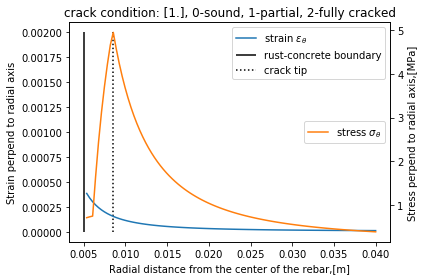

CPU times: user 435 ms, sys: 39.9 ms, total: 475 ms
Wall time: 494 ms


In [31]:
# initialize model
model_crack = Cracking_Model(raw_pars)
# model_crack.run(stochastic=False)
model_crack.run(stochastic=False)

In [19]:
M.postproc()
print(M.crack_visible_rate_count)
print(M.R_c - M.pars.r0_bar) #/ M.pars.cover
print(M.pars.cover)

for stochastic solution only
0.0
[[0.00385801 0.0037662  0.00334842 ... 0.00378164 0.00319159 0.00328867]]
[0.04134503 0.03538241 0.04341915 ... 0.04242668 0.03968566 0.03787586]


In [27]:
# stochastic
M.run(stochastic=True)
M.postproc()


/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:119: RuntimeWarning: divide by zero encountered in true_divide
  R_c = (b / (f_t * a / (E_0 * u_st) * ((b / a)**2 + 1) - 1)**0.5)
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:120: RuntimeWarning: divide by zero encountered in true_divide
  epsilon_theta[row_mask_1 & elem_mask] = (((b / r)**2 + 1) / ((b / R_c)**2 + 1) * f_t / E_0)[row_mask_1 & elem_mask]
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:162: RuntimeWarning: invalid value encountered in greater_equal
  row_mask_1 = ((epsilon_theta >= epsilon_cr).any(axis=1) & (epsilon_theta <= epsilon_cr).any(axis=1))[:, None]
/Users/gangli/Local Documents/Mitacs project local/Tinkrete/modules/cracking.py:162: RuntimeWarning: invalid value encountered in less_equal
  row_mask_1 = ((epsilon_theta >= epsilon_cr).any(axis=1) & (epsilon_theta <= epsilon_cr).any(axis=1))[:, None]
/Users/gangli/Local 

(array([29631.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 70369.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

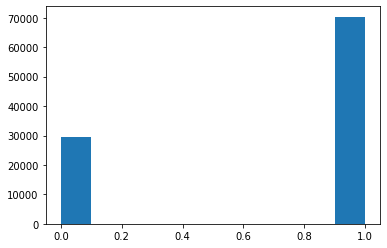

In [28]:
plt.figure()
plt.hist(M.crack_condition)

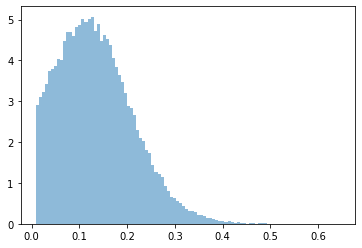

In [29]:
Hist_custom(M.crack_length_over_cover[M.crack_length_over_cover != 0])

In [22]:
M.crack_length_over_cover

array([[0.0933126 , 0.10644281, 0.07711856, ..., 0.08913348, 0.08042171,
        0.08682758]])

In [8]:
s=1000000
np.full((1, s), np.linspace(1, 2, s)).shape

(1, 1000000)

In [9]:
def f(number_of_points=200):
    r = np.full((1, number_of_points), np.linspace(0, 1, number_of_points))
    return r

In [10]:
f().shape

(1, 200)